# Classification of Multiclass Newswires

> Classify Reuters newswires into 46 mutually exclusive topics  
> **single-label & multi-class** classification problem  
> reference : Deep Learning with Python by Francois Chollet  
> data source : https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection

## 1. Data Preparation

In [1]:
import numpy as np
import pandas as pd

from keras import models
from keras import layers

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

/Users/ihongdon/anaconda3/envs/py3.5_tf1.4/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Loading the Reuters dataset from Keras

In [2]:
# Loading the Reuters dataset
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
print("number of training set : ", len(train_data)); 
print("number of test set : ", len(test_data))

number of training set :  8982
number of test set :  2246


In [4]:
unique, counts = np.unique(train_labels, return_counts=True)
dict(zip(unique, counts))

{0: 55,
 1: 432,
 2: 74,
 3: 3159,
 4: 1949,
 5: 17,
 6: 48,
 7: 16,
 8: 139,
 9: 101,
 10: 124,
 11: 390,
 12: 49,
 13: 172,
 14: 26,
 15: 20,
 16: 444,
 17: 39,
 18: 66,
 19: 549,
 20: 269,
 21: 100,
 22: 15,
 23: 41,
 24: 62,
 25: 92,
 26: 24,
 27: 15,
 28: 48,
 29: 19,
 30: 45,
 31: 39,
 32: 32,
 33: 11,
 34: 50,
 35: 10,
 36: 49,
 37: 19,
 38: 19,
 39: 24,
 40: 36,
 41: 30,
 42: 13,
 43: 21,
 44: 12,
 45: 18}

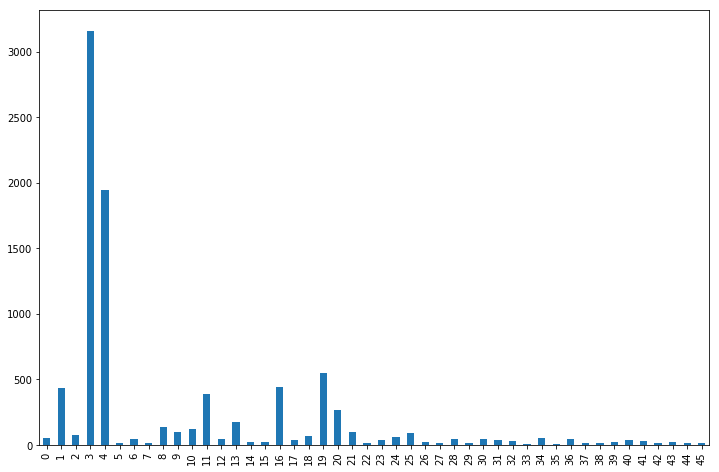

In [5]:
# bar plot of 'counts' per label
label_df = pd.DataFrame({'label': unique, 
                        'counts': counts})

label_df['counts'].plot(kind='bar')
plt.show()

In [6]:
# a list of integers
train_data[0][:10]

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207]

#### Decoding newswires back to text as an example

In [7]:
# getting word index
word_index = reuters.get_word_index()
word_index

{'henkel': 9888,
 'strongest': 7561,
 'hops': 17644,
 'linv': 23624,
 'premiere': 30941,
 'goh': 12831,
 'gallons': 4241,
 'subsidies': 1182,
 'fdx': 20089,
 'versions': 30456,
 'maneuvers': 19087,
 '6713': 28744,
 'gulfex': 21148,
 'rotberg': 12117,
 'gull': 14317,
 'philadelphia': 4180,
 'traning': 21509,
 "wessanen's": 28248,
 "nikko's": 20858,
 '693': 5886,
 'poisoning': 12038,
 'overbought': 14010,
 'helena': 14494,
 'beach': 5602,
 'catalysts': 19114,
 'paust': 28930,
 'demonstrating': 12435,
 '885': 5712,
 'compassion': 29016,
 'business': 215,
 'koss': 25607,
 'meto': 26284,
 'remedial': 10760,
 '6684': 21396,
 'unemployement': 29121,
 'lay': 3392,
 'heritage': 5377,
 'aided': 5138,
 'triweb': 25005,
 'quality': 1349,
 '558': 6076,
 'billes': 13655,
 'biomet': 27102,
 'suggest': 3063,
 'suzanne': 20491,
 "mobex's": 17326,
 'motion': 5283,
 'yeutter': 1129,
 'seetransport': 26530,
 'martens': 10480,
 'watered': 14065,
 'weakest': 15338,
 "chipmakers'": 21528,
 'holstein': 15362,

In [8]:
# reversing word index for decoding
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{1: 'the',
 2: 'of',
 3: 'to',
 4: 'in',
 5: 'said',
 6: 'and',
 7: 'a',
 8: 'mln',
 9: '3',
 10: 'for',
 11: 'vs',
 12: 'dlrs',
 13: 'it',
 14: 'reuter',
 15: '000',
 16: '1',
 17: 'pct',
 18: 'on',
 19: 'from',
 20: 'is',
 21: 'that',
 22: 'its',
 23: 'cts',
 24: 'by',
 25: 'at',
 26: 'year',
 27: 'be',
 28: 'with',
 29: '2',
 30: 'will',
 31: 'was',
 32: 'billion',
 33: 'he',
 34: 'u',
 35: 's',
 36: 'net',
 37: 'has',
 38: 'would',
 39: 'an',
 40: 'as',
 41: '5',
 42: 'not',
 43: 'loss',
 44: '4',
 45: '1986',
 46: 'company',
 47: 'which',
 48: 'but',
 49: 'this',
 50: 'shr',
 51: 'last',
 52: 'are',
 53: 'lt',
 54: 'have',
 55: 'or',
 56: '6',
 57: 'bank',
 58: '7',
 59: 'were',
 60: '8',
 61: 'had',
 62: 'oil',
 63: 'trade',
 64: 'share',
 65: 'one',
 66: 'about',
 67: '0',
 68: 'inc',
 69: '9',
 70: 'new',
 71: 'profit',
 72: 'also',
 73: 'market',
 74: 'they',
 75: 'two',
 76: 'shares',
 77: 'stock',
 78: 'corp',
 79: 'tonnes',
 80: '10',
 81: 'up',
 82: 'been',
 83: 'revs',
 8

In [9]:
# decoding using reverse_word_index
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

#### Encoding the data

In [10]:
# vectorize training data and test data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# vectorizing training data
x_train = vectorize_sequences(train_data)

# vectorizing test data
x_test = vectorize_sequences(test_data)

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
len(x_train[0])

10000

In [13]:
# One-hot encoding of label list
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# vectorizing training labels
one_hot_train_labels = to_one_hot(train_labels)

# vertorizing test labels
one_hot_test_labels = to_one_hot(test_labels)

In [14]:
one_hot_train_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## 2. Define the model

In [15]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

## 3. Compile the model

In [16]:
model.compile(optimizer='rmsprop', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])

## 4. Setting aside a validation set

In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## 5. Train the model

In [18]:
history = model.fit(partial_x_train, 
                   partial_y_train, 
                   epochs=20, 
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 131us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 82us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 78us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 78us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 78us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 77us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 82us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020
Epoch 

#### Plotting the training and validation results

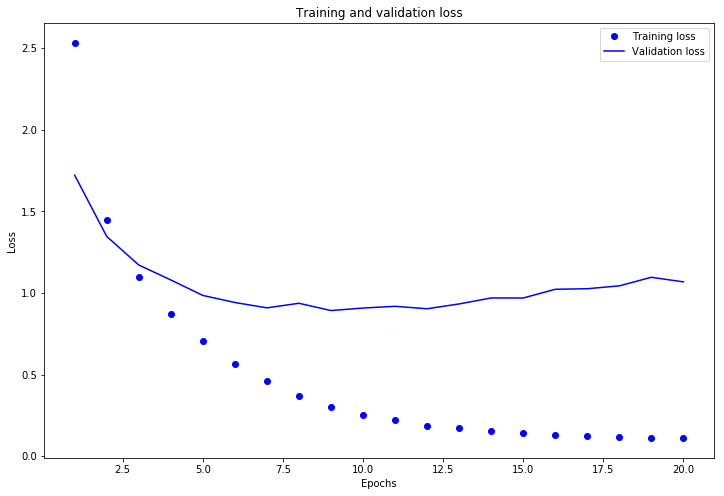

In [19]:
# plotting the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:
print("epochs num at minimum val_loss : ", np.argmin(val_loss) + 1)

epochs num at minimum val_loss :  9


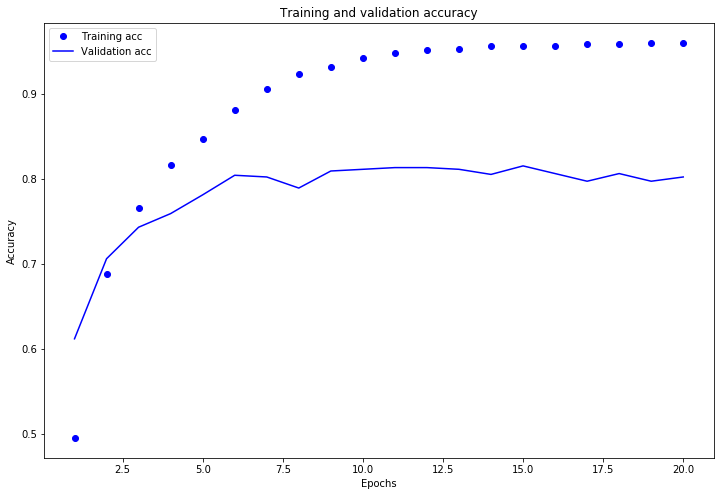

In [21]:
# plotting the training and validation accurach
plt.clf() # clears the figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Retrain a model from scratch

In [22]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
             loss='categorical_crossentropy', 
             metrics=['accuracy'])

epoch_num = np.argmin(val_loss) + 1

model.fit(x_train, 
         one_hot_train_labels, 
         epochs=epoch_num, 
         batch_size=512)

Epoch 1/9
8982/8982 [==============================] - 1s 92us/step - loss: 2.4437 - acc: 0.5332
Epoch 2/9
8982/8982 [==============================] - 1s 73us/step - loss: 1.3241 - acc: 0.7161
Epoch 3/9
8982/8982 [==============================] - 1s 73us/step - loss: 0.9744 - acc: 0.7869
Epoch 4/9
8982/8982 [==============================] - 1s 72us/step - loss: 0.7565 - acc: 0.8390
Epoch 5/9
8982/8982 [==============================] - 1s 73us/step - loss: 0.5963 - acc: 0.8764
Epoch 6/9
8982/8982 [==============================] - 1s 73us/step - loss: 0.4751 - acc: 0.9009
Epoch 7/9
8982/8982 [==============================] - 1s 72us/step - loss: 0.3831 - acc: 0.9175
Epoch 8/9
8982/8982 [==============================] - 1s 73us/step - loss: 0.3076 - acc: 0.9348
Epoch 9/9
8982/8982 [==============================] - 1s 74us/step - loss: 0.2591 - acc: 0.9414


## 6. Evaluate the final model with test data

In [23]:
test_loss, test_acc = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 114us/step


In [24]:
print("test loss : ", round(test_loss, 4));
print("test accuracy : ", round(test_acc, 4))

test loss :  0.98
test accuracy :  0.7903


In [25]:
# random classifier
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)

print("random classifier : ", round(float(np.sum(hits_array)) / len(test_labels) , 4))

random classifier :  0.1972


## 7. Predict new data

In [26]:
predictions = model.predict(x_test)

In [27]:
predictions[0]

array([1.13905335e-05, 4.55043773e-05, 2.59237822e-05, 8.89237463e-01,
       9.73151624e-02, 7.16575173e-08, 3.97129115e-05, 9.71739137e-05,
       7.56372046e-03, 1.61964010e-06, 4.32760971e-05, 5.41447254e-04,
       1.73280205e-05, 1.24912885e-05, 3.01332170e-06, 7.39441703e-06,
       8.65795650e-04, 2.50093493e-04, 1.59306481e-04, 9.10698436e-04,
       8.93751974e-04, 2.54670798e-04, 1.69807720e-06, 9.61139085e-05,
       2.29354259e-06, 1.84277291e-04, 1.92007496e-06, 1.43023890e-05,
       2.02517595e-06, 1.32420435e-04, 2.79030588e-04, 1.97888352e-04,
       8.87021179e-06, 1.97315549e-05, 4.53715656e-05, 2.09503778e-05,
       1.85421977e-05, 5.99541272e-05, 1.43793543e-04, 3.05342634e-04,
       1.78878781e-05, 1.18860975e-04, 1.33066942e-06, 1.98929520e-05,
       3.09856750e-06, 7.42029306e-06], dtype=float32)

In [28]:
predictions[0].shape

(46,)

In [29]:
# sum of the coefficients = 1
np.sum(predictions[0])

0.99999994

In [30]:
# the largest entry of the predicted class
np.argmax(predictions[0])

3

## The End